In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's do a simple example of logistic regression

data = [[9, 1, 10],
        [13, 2, 15],
        [9, 3, 12],
        [10, 5, 15],
        [7, 6, 13],
        [3, 5, 8],
        [4, 13, 17],
        [2, 8, 10],
]
df = pd.DataFrame(data, columns=['No', 'Yes', 'Total'])

In [3]:
# Now let's plot the data with No and Yes on the y-axis and instance number on the x-axis



In [4]:
# Now calculate the probability of Yes, the odds and log odds
df['Probs'] = df['Yes'] / df['Total']
df['Odds'] = df['Probs'] / (1 - df['Probs'])
df['LogOdds'] = np.log(df['Odds'])
df

,No,Yes,Total,Probs,Odds,LogOdds
0,9,1,10,0.100000,0.111111,-2.197225
1,13,2,15,0.133333,0.153846,-1.871802
2,9,3,12,0.250000,0.333333,-1.098612
3,10,5,15,0.333333,0.500000,-0.693147
4,7,6,13,0.461538,0.857143,-0.154151
5,3,5,8,0.625000,1.666667,0.510826
6,4,13,17,0.764706,3.250000,1.178655
7,2,8,10,0.800000,4.000000,1.386294


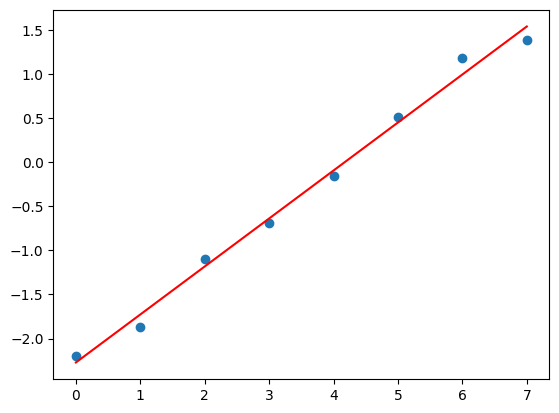

In [5]:
# We can now do a linear regression using the LogOdds as the dependent variable and the instance number as the independent variable
# We can then plot the regression line on the graph above
# Remember that this is the regression line for the log odds, not the probability

from sklearn.linear_model import LinearRegression

dX = df.index.values.reshape(-1, 1)
dy = df['LogOdds']
reg = LinearRegression().fit(dX, dy)

# plot the data
plt.scatter(dX, dy)

# Now let's plot the regression line on the graph above
x = np.linspace(0, 7, 100)
y = reg.coef_[0] * x + reg.intercept_
plt.plot(x, y, '-r')
plt.show()

<Axes: ylabel='Probs'>

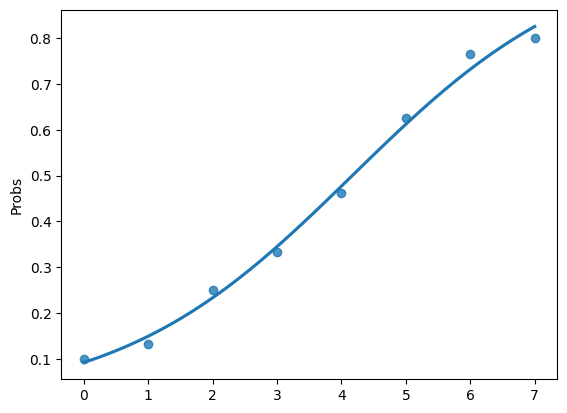

In [6]:
# Now let's do a logistic regression using the Yes/No as the dependent variable and the instance number as the independent variable

from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels


sns.regplot(x=dX, y=df['Probs'], logistic=True, ci=None)